In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import os

def get_newest_csv_file(dir_path):
    csv_files = []
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            csv_files.append(file)
    if not csv_files:
        return None
    newest_csv_file = max(csv_files, key=os.path.getctime)
    return os.path.join(dir_path, newest_csv_file)

In [2]:
csv_file = get_newest_csv_file('/Users/heiko/Development/drasyl/')
print(csv_file)

/Users/heiko/Development/drasyl/WormholeReceiveChildChannelInitializer-23465.csv


In [3]:
df = pd.read_csv(csv_file)

# RFC 9293: Send Sequence Variables
df['Rel.SND.UNA'] = df['SND.UNA'] - df['ISS']
df['Rel.SND.NXT'] = df['SND.NXT'] - df['ISS']
df['Rel.SND.WL1'] = df['SND.WL1'] - df['IRS']
df['Rel.SND.WL2'] = df['SND.WL2'] - df['IRS']

# RFC 9293: Receive Sequence Variables
df['Rel.RCV.NXT'] = df['RCV.NXT'] - df['IRS']

df

,pid,time,SND.UNA,SND.NXT,SND.WND,SND.WL1,SND.WL2,ISS,SND.BUF,RCV.NXT,...,RTTVAR,SRTT,RTO,cwnd,ssthresh,Rel.SND.UNA,Rel.SND.NXT,Rel.SND.WL1,Rel.SND.WL2,Rel.RCV.NXT
0,23465,"Mon, 20 Mar 2023 05:15:56 +0100",2190620909,2190620951,91648,2122000604,2190620909,2190620908,0,2122000605,...,29.500000,59.0,1000,3789,91648,1,43,0,68620305,1
1,23465,"Mon, 20 Mar 2023 05:15:57 +0100",2190620951,2190620951,91606,2122000605,2190620951,2190620908,0,2122000605,...,29.625000,55.0,1000,3831,91648,43,43,1,68620347,1
2,23465,"Mon, 20 Mar 2023 05:15:57 +0100",2190620951,2190620951,91606,2122000605,2190620951,2190620908,0,2122001869,...,35.164062,65.0,1000,3831,91648,43,43,1,68620347,1265
3,23465,"Mon, 20 Mar 2023 05:15:57 +0100",2190620951,2190620951,91606,2122000605,2190620951,2190620908,0,2122035497,...,1.505925,28.0,1000,3831,91648,43,43,1,68620347,34893
4,23465,"Mon, 20 Mar 2023 05:15:57 +0100",2190620951,2190620951,91606,2122000605,2190620951,2190620908,0,2122138783,...,6.533636,29.0,1000,3831,91648,43,43,1,68620347,138179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,23465,"Mon, 20 Mar 2023 05:16:30 +0100",2190620952,2190620952,91606,2167738863,2190620952,2190620908,0,2167738863,...,2.174907,21.0,1000,3832,91648,44,44,45738259,68620348,45738259
332,23465,"Mon, 20 Mar 2023 05:16:30 +0100",2190620952,2190620952,91606,2167738863,2190620952,2190620908,0,2167738863,...,2.174907,21.0,1000,3832,91648,44,44,45738259,68620348,45738259
333,23465,"Mon, 20 Mar 2023 05:16:30 +0100",2190620952,2190620952,91606,2167738863,2190620952,2190620908,0,2167738863,...,2.174907,21.0,1000,3832,91648,44,44,45738259,68620348,45738259
334,23465,"Mon, 20 Mar 2023 05:16:30 +0100",2190620952,2190620952,91606,2167738863,2190620952,2190620908,0,2167738863,...,2.174907,21.0,1000,3832,91648,44,44,45738259,68620348,45738259


# RFC 9293: Send Sequence Variables

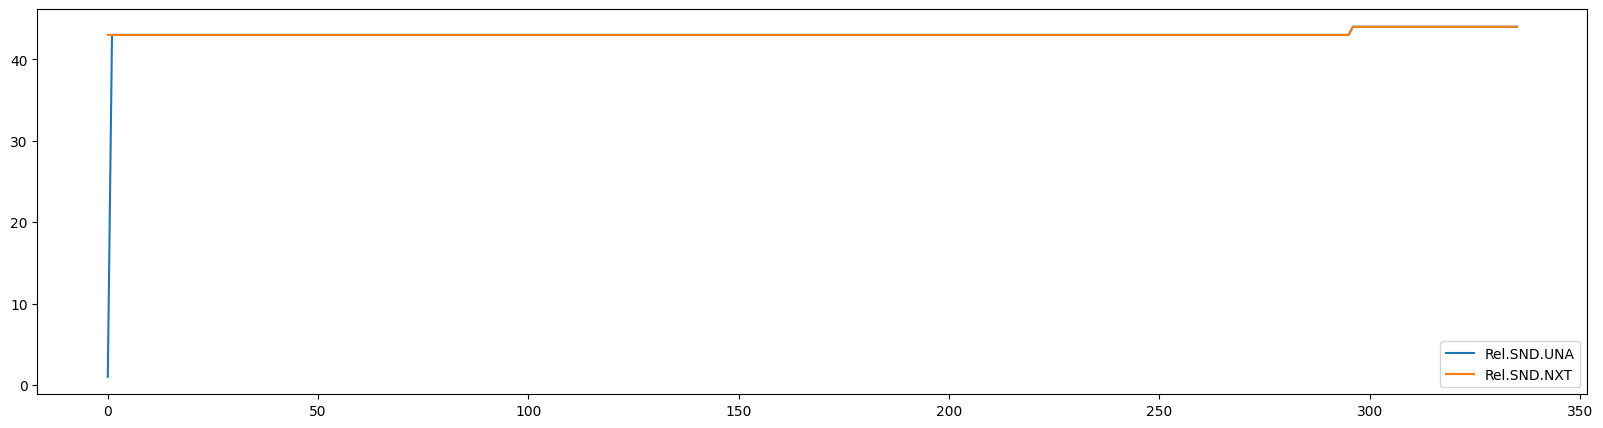

In [4]:
df.plot(y=['Rel.SND.UNA', 'Rel.SND.NXT'], figsize=(20, 5))
mp.show()

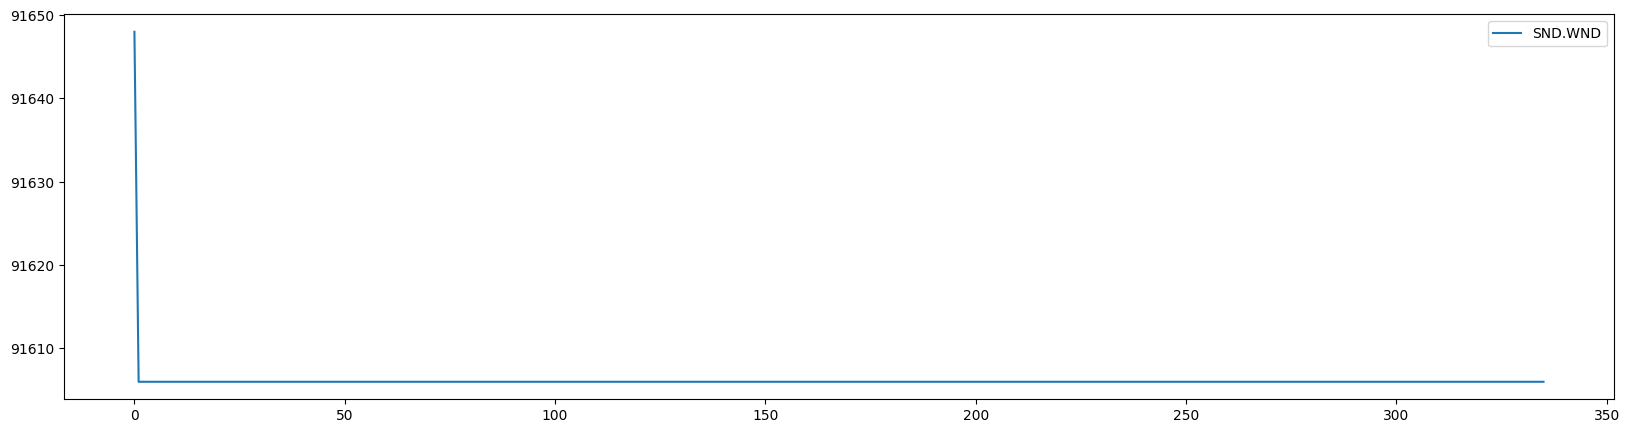

In [5]:
df.plot(y=['SND.WND'], figsize=(20, 5))
mp.show()

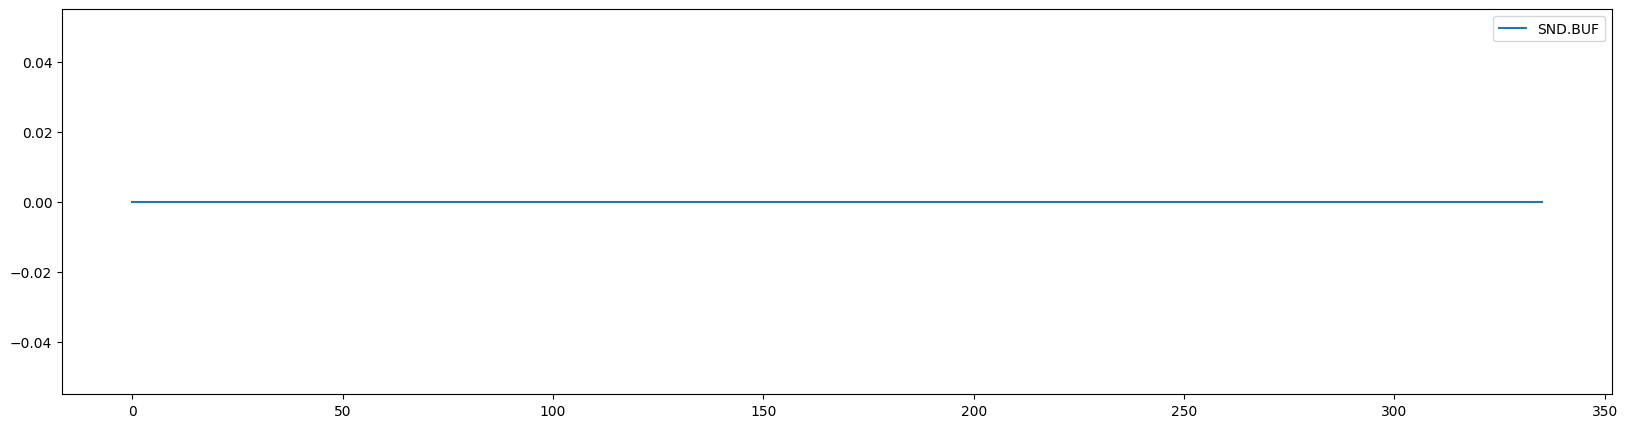

In [6]:
df.plot(y=['SND.BUF'], figsize=(20, 5))
mp.show()

# RFC 9293: Receive Sequence Variables

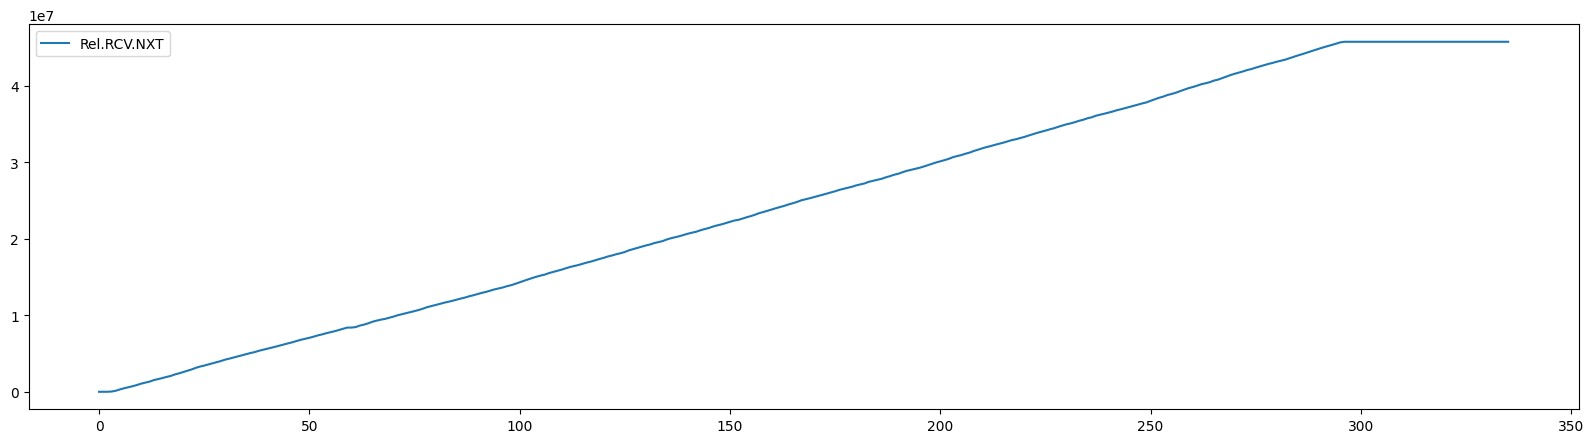

In [7]:
df.plot(y=['Rel.RCV.NXT'], figsize=(20, 5))
mp.show()

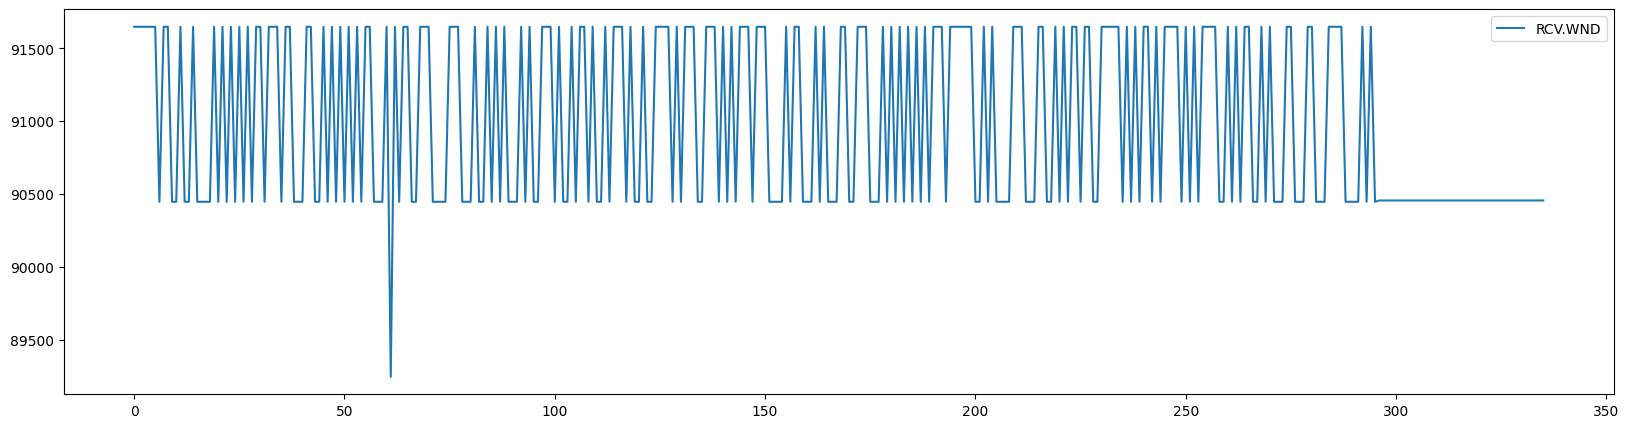

In [8]:
df.plot(y=['RCV.WND'], figsize=(20, 5))
mp.show()

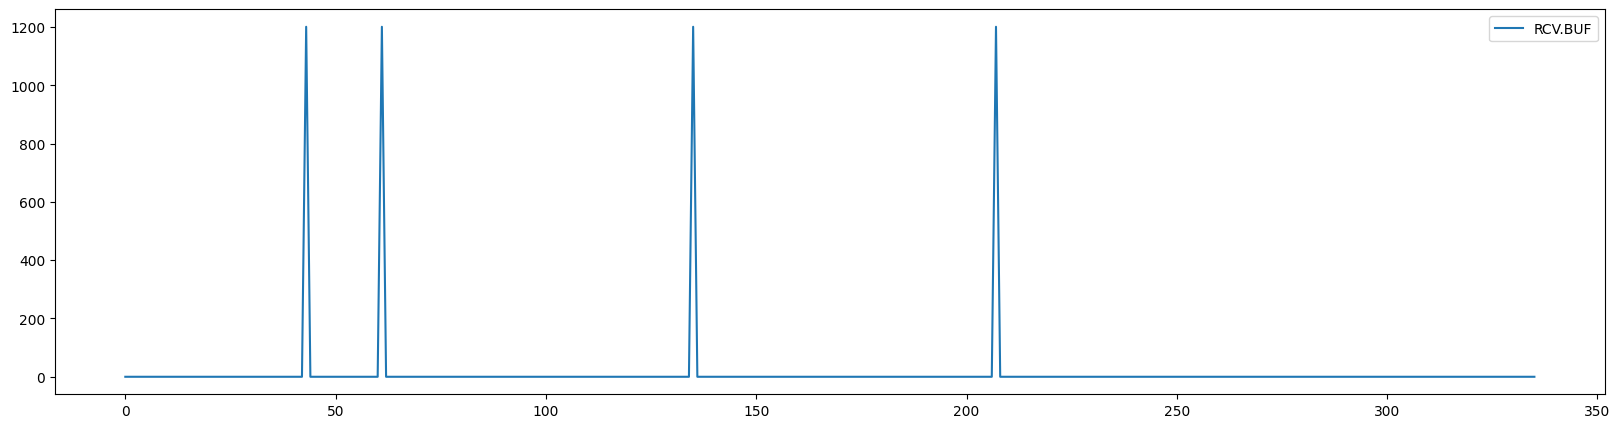

In [9]:
df.plot(y=['RCV.BUF'], figsize=(20, 5))
mp.show()

# RFC 6298: Retransmission Timer Computation

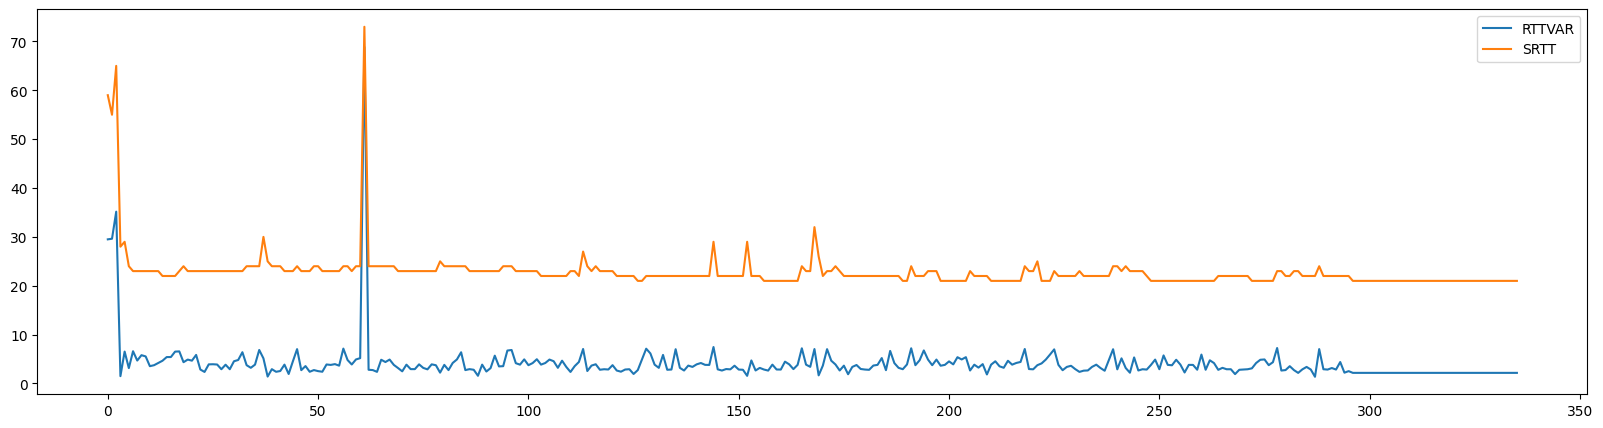

In [10]:
df.plot(y=['RTTVAR', 'SRTT'], figsize=(20, 5))
mp.show()

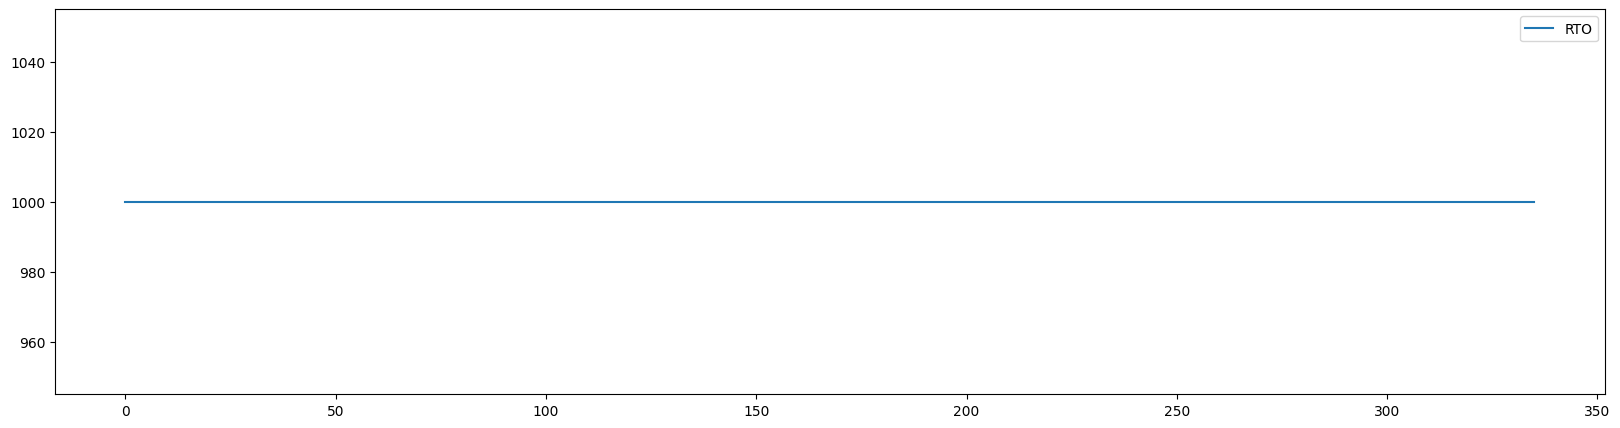

In [11]:
df.plot(y=['RTO'], figsize=(20, 5))
mp.show()

# RFC 5681: Congestion Control Algorithms

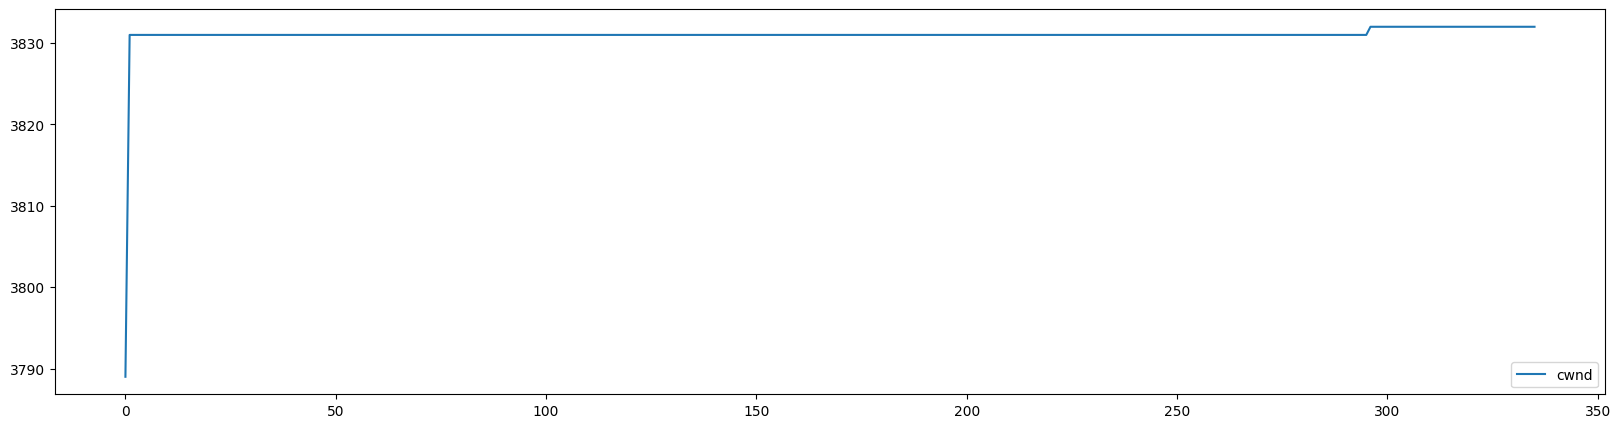

In [12]:
df.plot(y=['cwnd'], figsize=(20, 5))
mp.show()

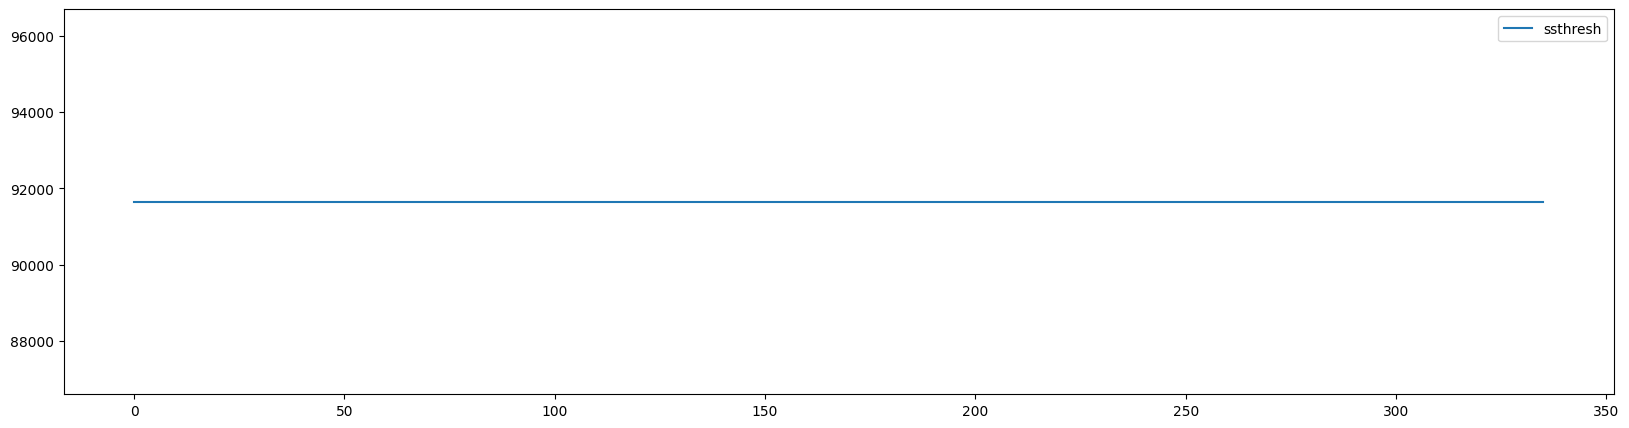

In [13]:
df.plot(y=['ssthresh'], figsize=(20, 5))
mp.show()

# Misc

<AxesSubplot: >

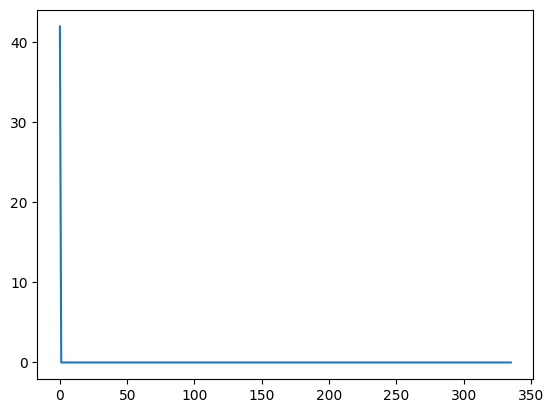

In [14]:
df['Unacknowledged Data'] = df['SND.NXT'] - df['SND.UNA']
df['Unacknowledged Data'].plot()